# Stationary Time Series (정상 시계열)

In [1]:
import statsmodels as ss
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## What is Stationarity (정상성)?

1. constant mean (일정한 평균)  
2. constant variance (일정한 분산)  
3. constant autocorrelation structure (일정한 자기상관)  
4. no periodic component (주기 성분 없음)

In [2]:
# white noise 생성
np.random.seed(101)

time = np.arange(500)
stationary = np.random.normal(loc=0, scale=1.0, size=len(time))

In [3]:
def plot_sequence(x, y, title):
    plt.figure(figsize=(16, 4))
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel("time")
    plt.ylabel("series value")
    plt.grid(alpha=0.3)
    plt.show()

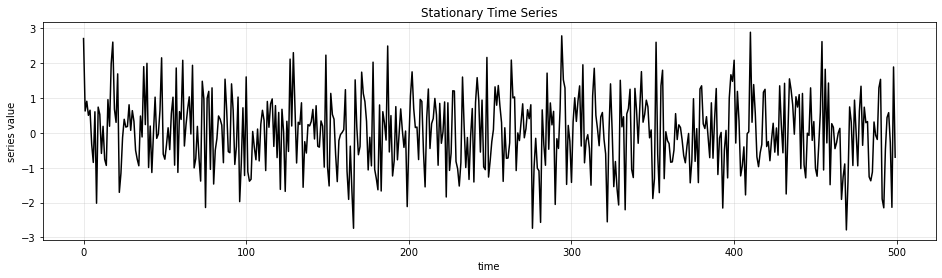

In [4]:
plot_sequence(time, stationary, title="Stationary Time Series")

- 위의 플롯에는 뚜렷한 추세나 계절성이 없습니다. 이 시계열 데이터는 4가지 정상성 조건인 일정한 평균, 일정한 분산, 일정한 자기상관, 주기 성분 없음을 충족합니다.  

- 시계열의 histogram 을 plotting 하여 정규분포를 보이면 평균과 분산이 일정하다는 확신을 얻을 수 있습니다.

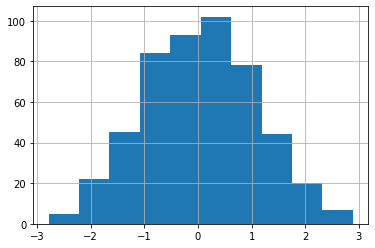

In [5]:
pd.Series(stationary).hist();

## Autocorrelation Structure  (자기 상관 구조)

- 특정 시점(step)이 다른 시점(step)과 수치적 연관성 있음.

- 자기상관성은 difference(차분)에 의해 stationary 로 바꿀 수 있다.

In [6]:
# seed to start series
seed = 3.14

# 자기 상관 데이터 생성
lagged = np.empty_like(time, dtype='float')
for t in time:
    lagged[t] = seed + np.random.normal(loc=0, scale=2.5, size=1)
    seed = lagged[t] #자기 상관성 부여

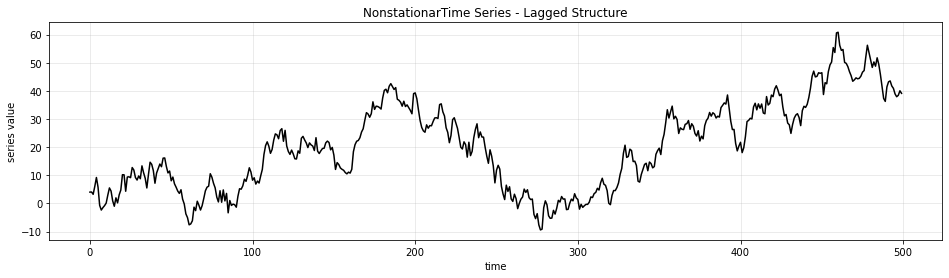

In [7]:
plot_sequence(time, lagged, 
              title="NonstationarTime Series - Lagged Structure")

시계열이 균일분포 등 비정규분포를 보이면 non-stationay 라고 판단 가능

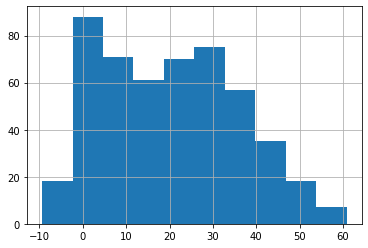

In [8]:
pd.Series(lagged).hist();

## non-stationary (비정상) data의 특징

1. Trend (평균의 변화)가 존재
2. 이분산성(변동 분산)  
3. Seasonality (계절성, 주기적 구성요소)  
4. Trend + Seasonality

### Trend

평균이 시간이 지남에 따라 변하므로 non-stationary

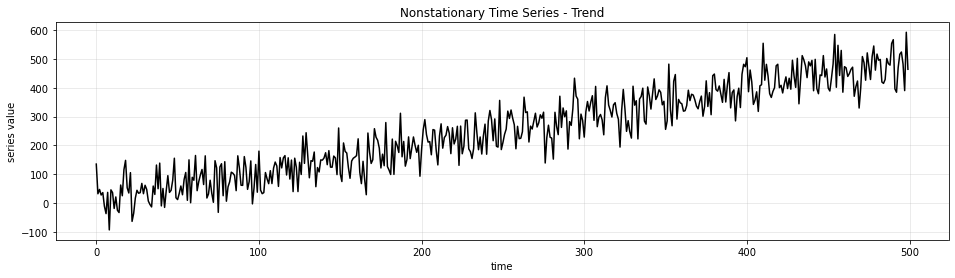

In [9]:
trend = time + stationary * 50

plot_sequence(time, trend, title="Nonstationary Time Series - Trend")

### 이분산성(변동 분산)

시간에 따른 분산의 변화

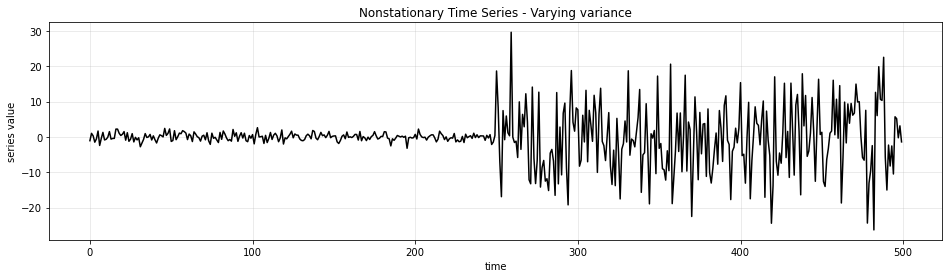

In [10]:
np.random.seed(123)

# data
level_1 = np.random.normal(loc=0, scale=1.0, size = 250)
level_2 = np.random.normal(loc=0, scale=10.0, size = 250)
data = np.append(level_1, level_2)

plot_sequence(time, data, 
              title="Nonstationary Time Series - Varying variance")

### Seasonality

- 정상 시계열은 시계열이 관측되는 시간에 따라 속성이 달라지지 않는 시계열입니다. 따라서 추세가 있는 시계열 또는 계절성이 있는 시계열은 고정적이지 않습니다. 추세와 계절성은 다른 시간에 시계열 값에 영향을 미칩니다.

- 주기적인 요소가 있으므로 non-stationary

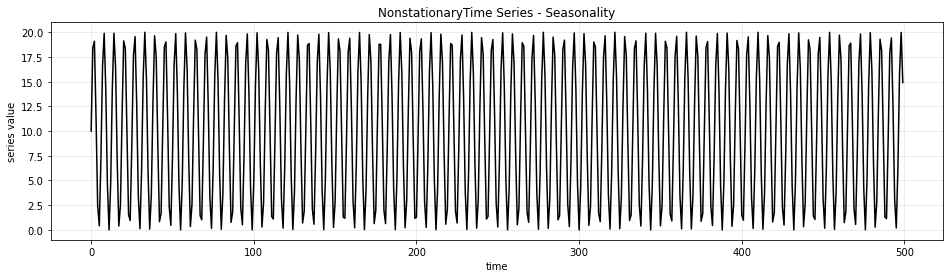

In [11]:
seasonality = 10 + np.sin(time) * 10

plot_sequence(time, seasonality, 
              title="NonstationaryTime Series - Seasonality")

### Trend + Seasonality

평균이 시간이 지남에 따라 변하고 주기적인 구성 요소가 있으므로 non-stationary

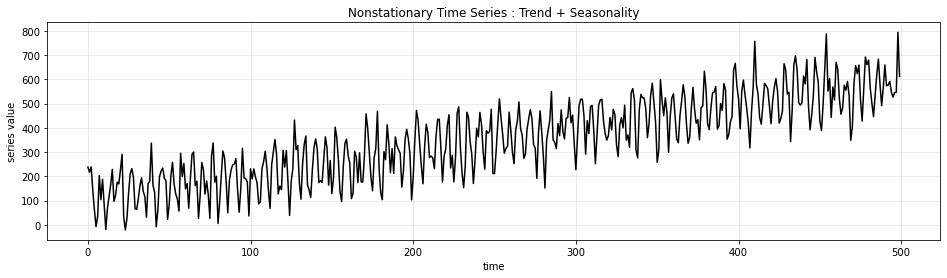

In [12]:
trend_seasonality = trend + seasonality * 10 + stationary

plot_sequence(time, trend_seasonality, 
              title="Nonstationary Time Series : Trend + Seasonality")

### autocorrelation + trend

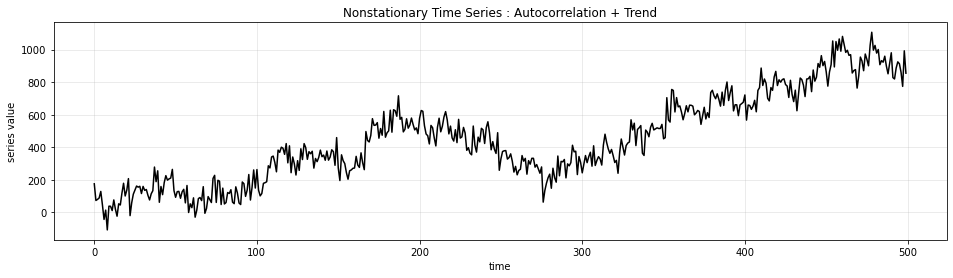

In [13]:
auto_correlation = lagged * 10 + trend

plot_sequence(time, auto_correlation, 
              title="Nonstationary Time Series : Autocorrelation + Trend")

### Regime changes

regime change 는 structural break 라고도 하며 data 생성 과정에 변화가 생겨 다른 분포를 만들 때를 뜻한다. 아래의 예는 regime change 가 있어서 전체 data set 을 regression 하는 것보다 data 를 쪼개는 것이 더 잘 맞는 경우를 보여준다. 이런 경우 기저에 깔린 시스템이 변하였으므로 model 이 regime change 이후의 data 에는 더 이상 predictive 하지 못한다. 

따라서, 주식 시장에 공식을 적용할 때는 regime change 여부를 매번 검증해야 한다.

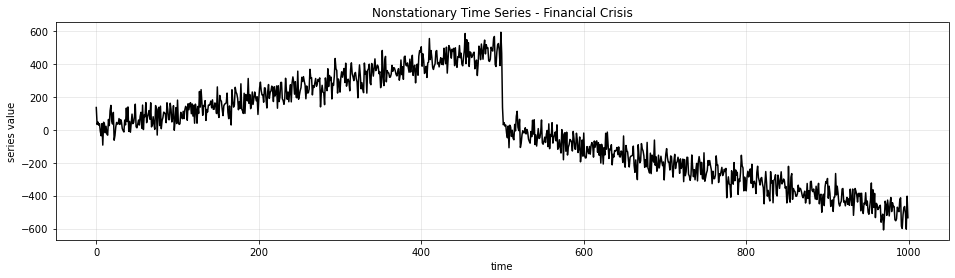

In [14]:
time2 = np.arange(time.size * 2)
trend2 = -time + stationary * 50
financial_crisis = np.append(trend, trend2)

plot_sequence(time2, financial_crisis, 
              title="Nonstationary Time Series - Financial Crisis")

## Differencing 으로 Autocorrelation 제거

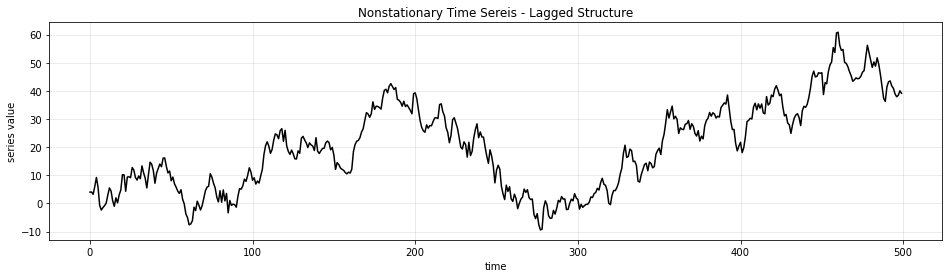

In [15]:
plot_sequence(time, lagged, 
              title="Nonstationary Time Sereis - Lagged Structure")

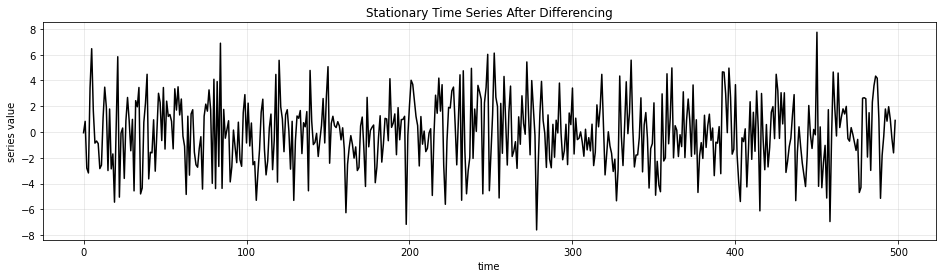

In [16]:
difference = lagged[:-1] - lagged[1:]

plot_sequence(time[:-1], difference, 
              title="Stationary Time Series After Differencing")

<AxesSubplot:>

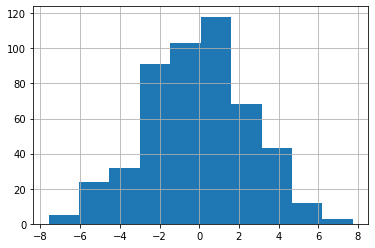

In [17]:
pd.Series(difference).hist()

## pandas autocorrelation_plot

- Time series 가 random 한 경우 autocorrelation 은 모든 time-lag 에서 zero 에 가까워야 함  

- Time series 가 non-random 한 경우 하나 이상의 autocorrelation 이 크게 non-zero 값을 보임  

- 플롯의 수평선은 95% 및 99% 신뢰 대역에 해당. 점선은 99% 신뢰 구간.

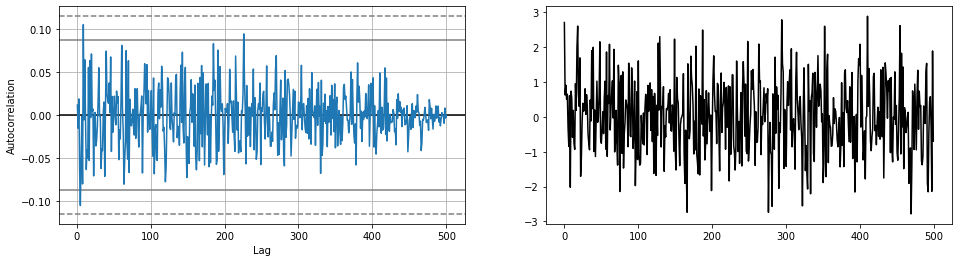

In [18]:
from pandas.plotting import autocorrelation_plot

# 정상성 data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
autocorrelation_plot(stationary, ax=ax1)
ax2.plot(stationary, 'k-')

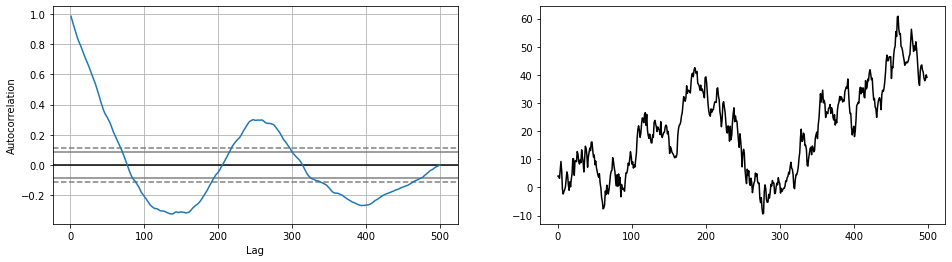

In [19]:
# 자기 상관 data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
autocorrelation_plot(lagged, ax=ax1)
ax2.plot(lagged, 'k-')

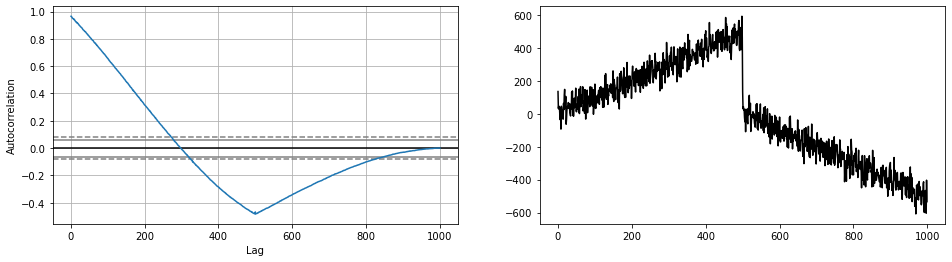

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
autocorrelation_plot(financial_crisis, ax=ax1)
ax2.plot(financial_crisis, 'k-')

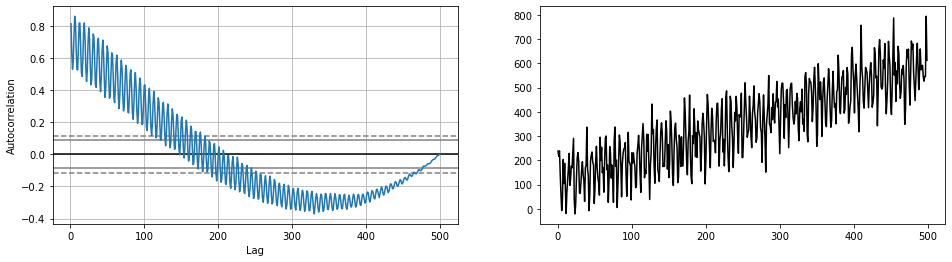

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
autocorrelation_plot(trend_seasonality, ax=ax1)
ax2.plot(trend_seasonality, 'k-')